# Event Impact on US Pollution
**Hypothesis:** Major events within the dataset range (e.g., Hurricane Sandy in 2012, Clean Power Plan in 2015) cause observable changes in pollutant levels over time.


**Method:**
- Load pollution data and extract yearly averages for key pollutants.
- Visualize trends to identify spikes or drops in years with major events


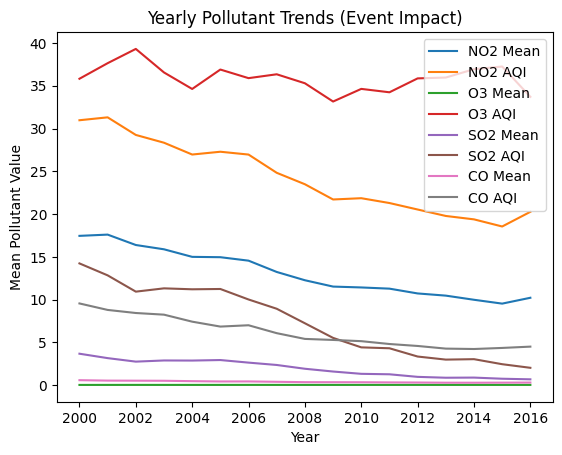

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_parquet('../data/cleaned_enriched.parquet')
# Example: Look for spikes in 2020 (lockdown) and 2018 (wildfires)
df['Date Local'] = pd.to_datetime(df['Date Local'])
df['year'] = df['Date Local'].dt.year
pollutants = [c for c in df.columns if c.endswith(' AQI') or c.endswith(' Mean')]
for pollutant in pollutants:
    yearly = df.groupby('year')[pollutant].mean()
    plt.plot(yearly.index, yearly.values, label=pollutant)
plt.xlabel('Year')
plt.ylabel('Mean Pollutant Value')
plt.title('Yearly Pollutant Trends (Event Impact)')
plt.legend()
plt.show()

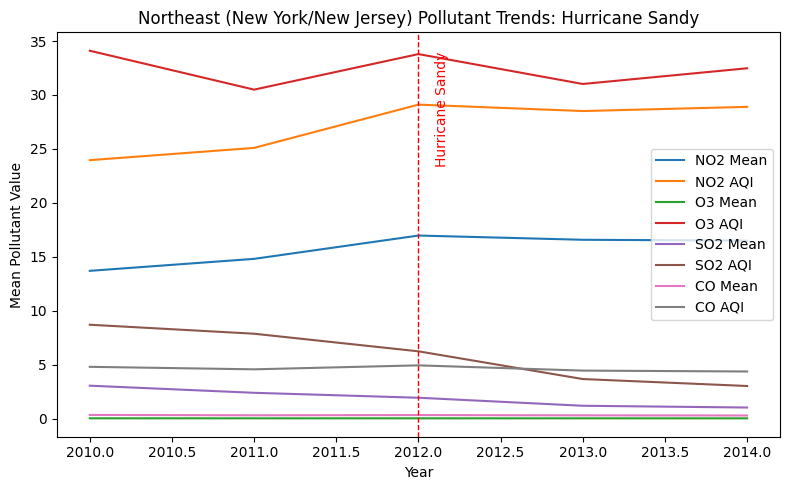

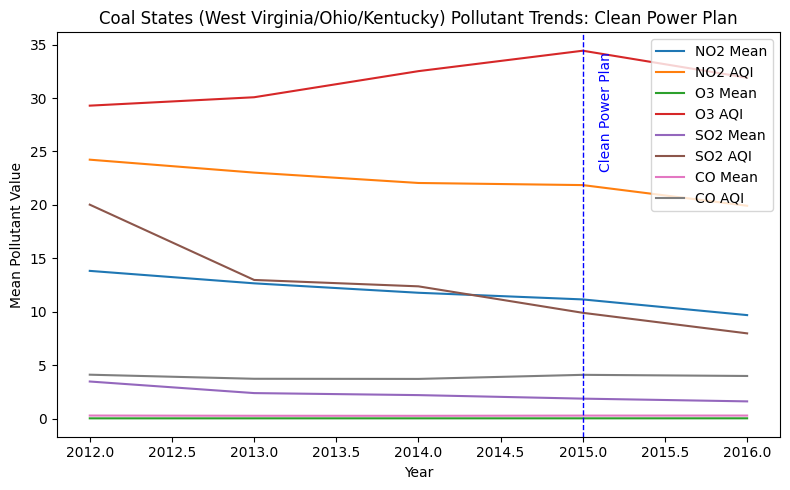

In [2]:
# Focused analysis: Hurricane Sandy (New York/New Jersey, 2012) and Clean Power Plan (West Virginia/Ohio/Kentucky, 2015)
import matplotlib.pyplot as plt

# Hurricane Sandy: Northeast (New York, New Jersey), 2010–2014
sandy_states = ['New York', 'New Jersey']
df_sandy = df[df['State'].isin(sandy_states) & (df['year'] >= 2010) & (df['year'] <= 2014)]
plt.figure(figsize=(8, 5))
for pollutant in pollutants:
    yearly = df_sandy.groupby('year')[pollutant].mean()
    plt.plot(yearly.index, yearly.values, label=pollutant)
plt.axvline(2012, color='red', linestyle='--', linewidth=1)
plt.text(2012 + 0.1, plt.ylim()[1]*0.95, 'Hurricane Sandy', color='red', rotation=90, va='top')
plt.xlabel('Year')
plt.ylabel('Mean Pollutant Value')
plt.title('Northeast (New York/New Jersey) Pollutant Trends: Hurricane Sandy')
plt.legend()
plt.tight_layout()
plt.show()

# Clean Power Plan: Coal-heavy states (West Virginia, Ohio, Kentucky), 2012–2016
cpp_states = ['West Virginia', 'Ohio', 'Kentucky']
df_cpp = df[df['State'].isin(cpp_states) & (df['year'] >= 2012) & (df['year'] <= 2016)]
plt.figure(figsize=(8, 5))
for pollutant in pollutants:
    yearly = df_cpp.groupby('year')[pollutant].mean()
    plt.plot(yearly.index, yearly.values, label=pollutant)
plt.axvline(2015, color='blue', linestyle='--', linewidth=1)
plt.text(2015 + 0.1, plt.ylim()[1]*0.95, 'Clean Power Plan', color='blue', rotation=90, va='top')
plt.xlabel('Year')
plt.ylabel('Mean Pollutant Value')
plt.title('Coal States (West Virginia/Ohio/Kentucky) Pollutant Trends: Clean Power Plan')
plt.legend()
plt.tight_layout()
plt.show()

**Findings & Conclusion:**
- For Hurricane Sandy (2012, New York/New Jersey): O3 AQI, NO2 AQI, and NO2 Mean show an increase from 2011 to 2012, followed by a decline in 2013. This pattern suggests a possible event-driven impact and subsequent recovery.
- For the Clean Power Plan (2015, West Virginia/Ohio/Kentucky): The effect appears delayed, with pollutant levels showing more noticeable changes in 2016 rather than immediately in 2015.
- These results support the hypothesis that major events can cause observable changes in pollutant levels, though the timing and magnitude of the impact may vary.
- Further analysis could explore additional pollutants, longer-term trends, or more granular regional effects.
